In [1]:
!pip install tensorflow-gpu==2.5.0
!pip show tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 17 kB/s 
     |████████████████████████████████| 1.2 MB 43.1 MB/s 
     |████████████████████████████████| 4.0 MB 55.9 MB/s 
     |████████████████████████████████| 462 kB 58.8 MB/s 
     |████████████████████████████████| 132 kB 37.7 MB/s 
     |████████████████████████████████| 14.8 MB 39.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68715 sha256=015d2fdc37784c198eab9d7a943d4e520cfcba79aac438a8edad84a909074965
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

Name: tensorflow-gpu
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-preprocessing, tensorflow-estimator, h5py, tensorboard, six, gast, google-pasta, flatbuffers, keras-nightly, absl-py, grpcio, protobuf, wrapt, typing-extensions, wheel, opt-einsum, numpy, termcolor, astunparse
Required-by: 


In [2]:
import os
import shutil
import random

In [3]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12277, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 12277 (delta 38), reused 37 (delta 17), pack-reused 12198
Receiving objects: 100% (12277/12277), 12.64 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (8441/8441), done.
/content/yolov5


In [4]:
!pip install -qr requirements.txt  

     |████████████████████████████████| 1.6 MB 6.9 MB/s 


In [5]:
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.2-109-g23701ea Python-3.7.13 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.6/107.7 GB disk)


In [6]:
def create_data_directories(data_name):
    Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    
create_data_directories('dental_disease')

In [7]:
!cat data/data.yaml


train: ../datasets/dental_disease/images/train
val: ../datasets/dental_disease/images/valid
test: ../datasets/dental_disease/images/test

nc: 5
names: ['Endo', 'Filling', 'Implant', 'Pulp', 'Restoration']

In [8]:
!python train.py --batch 32 --epochs 50 --data 'data/data.yaml' --weights 'yolov5s6.pt' --project 'runs_dental_disease' --name 'feature_extraction' --cache --freeze 12
clear_output()

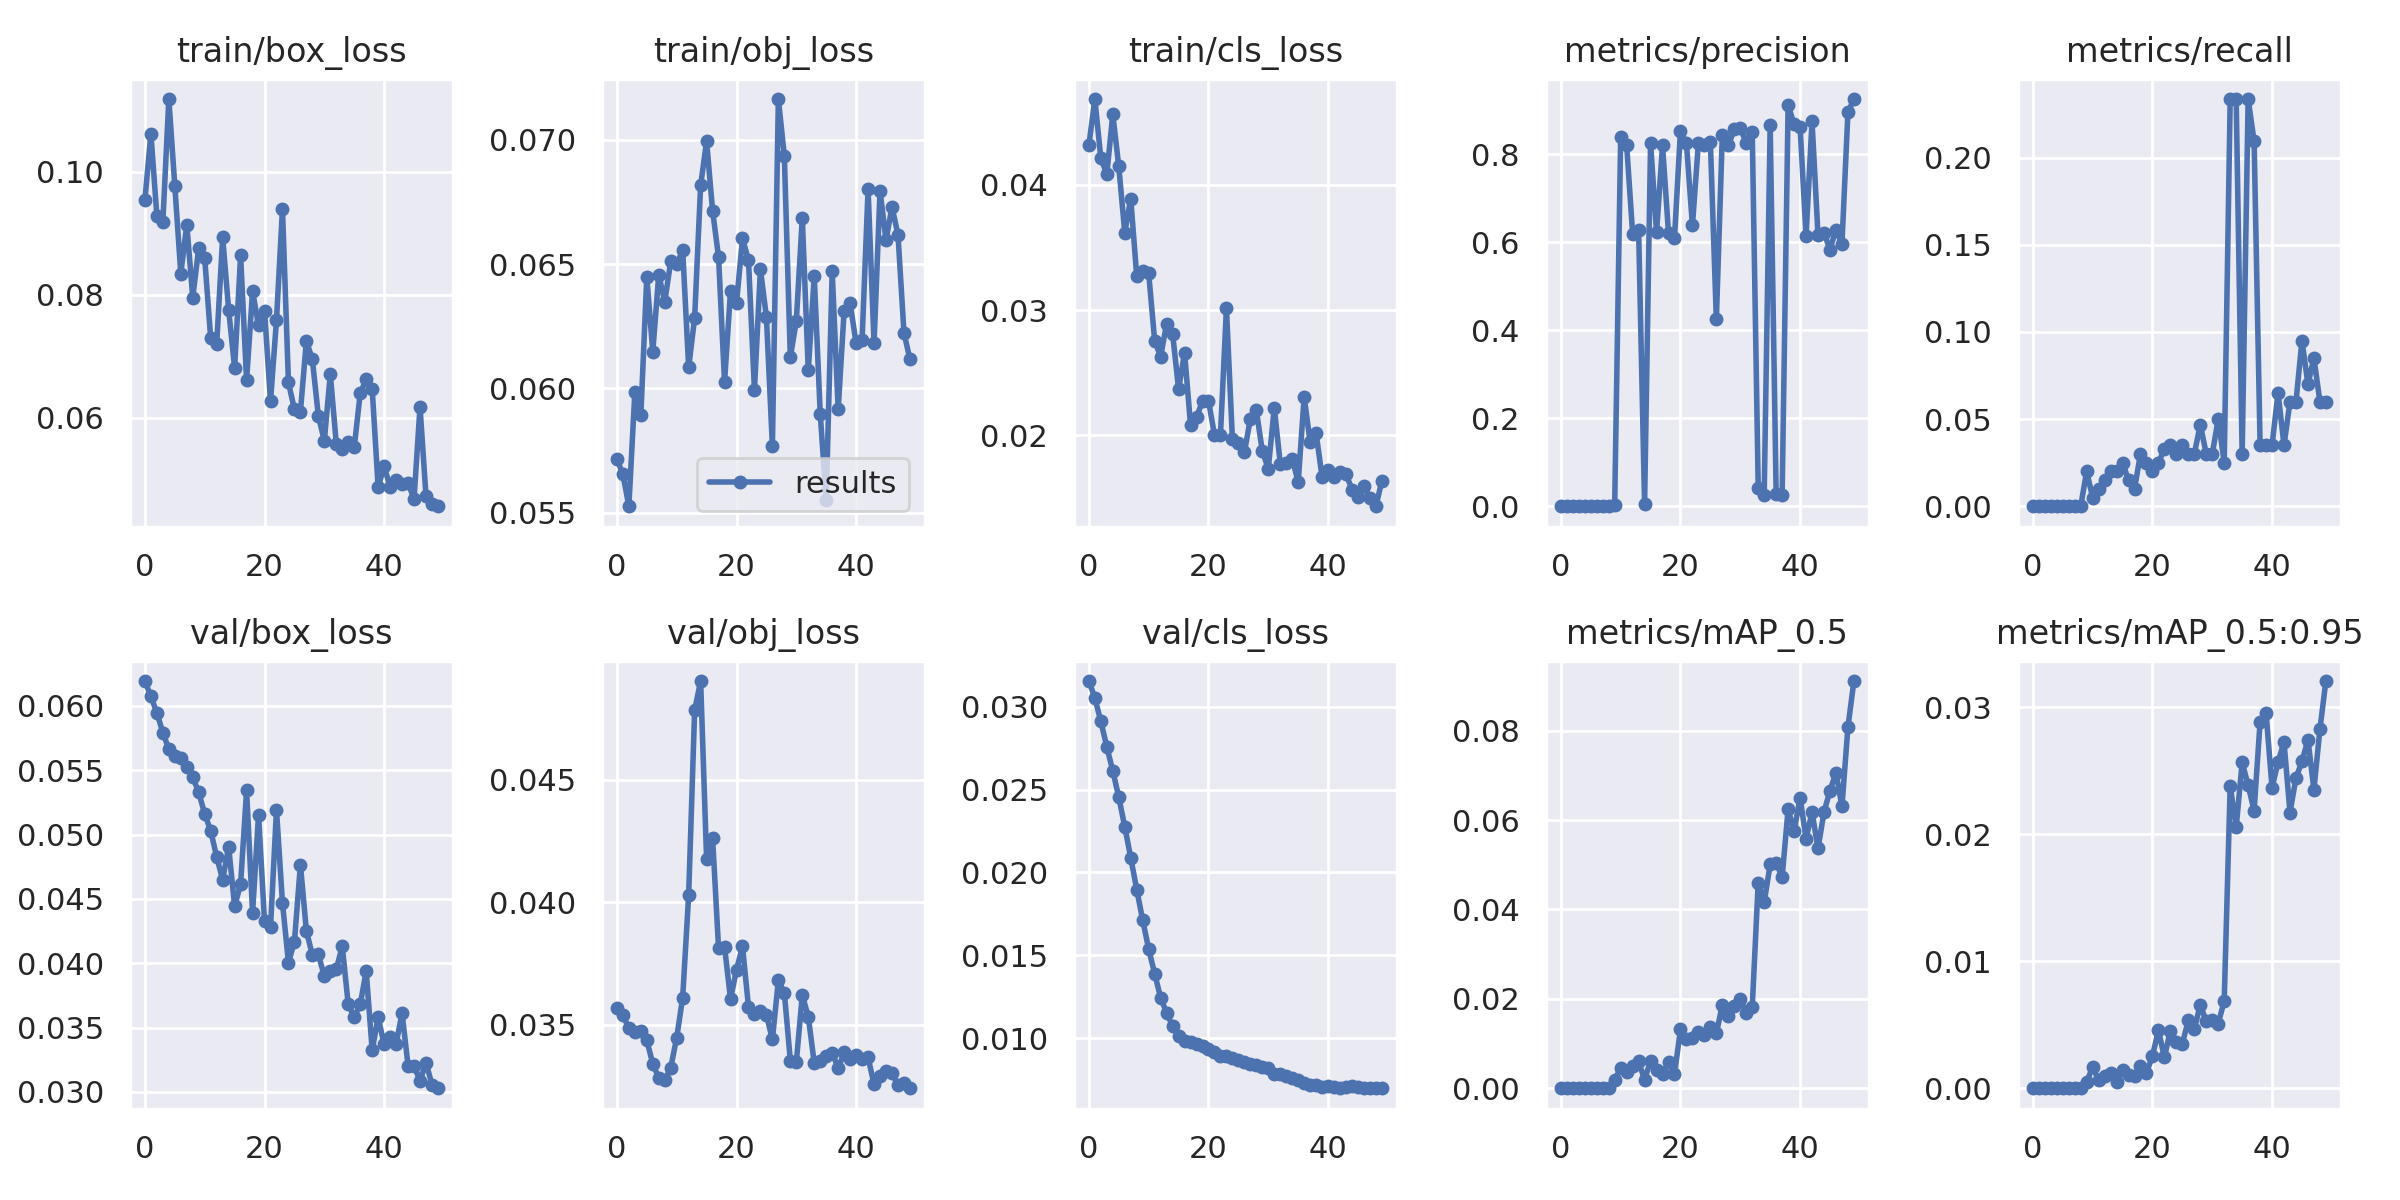

In [9]:
display.Image(f"runs_dental_disease/feature_extraction/results.png")

In [10]:
!python train.py --hyp 'hyp.VOC.yaml' --batch 16 --epochs 50 --data 'data/data.yaml' --weights 'runs_dental_disease/feature_extraction/weights/best.pt' --project 'runs_dental_disease' --name 'fine-tuning' --cache
clear_output()

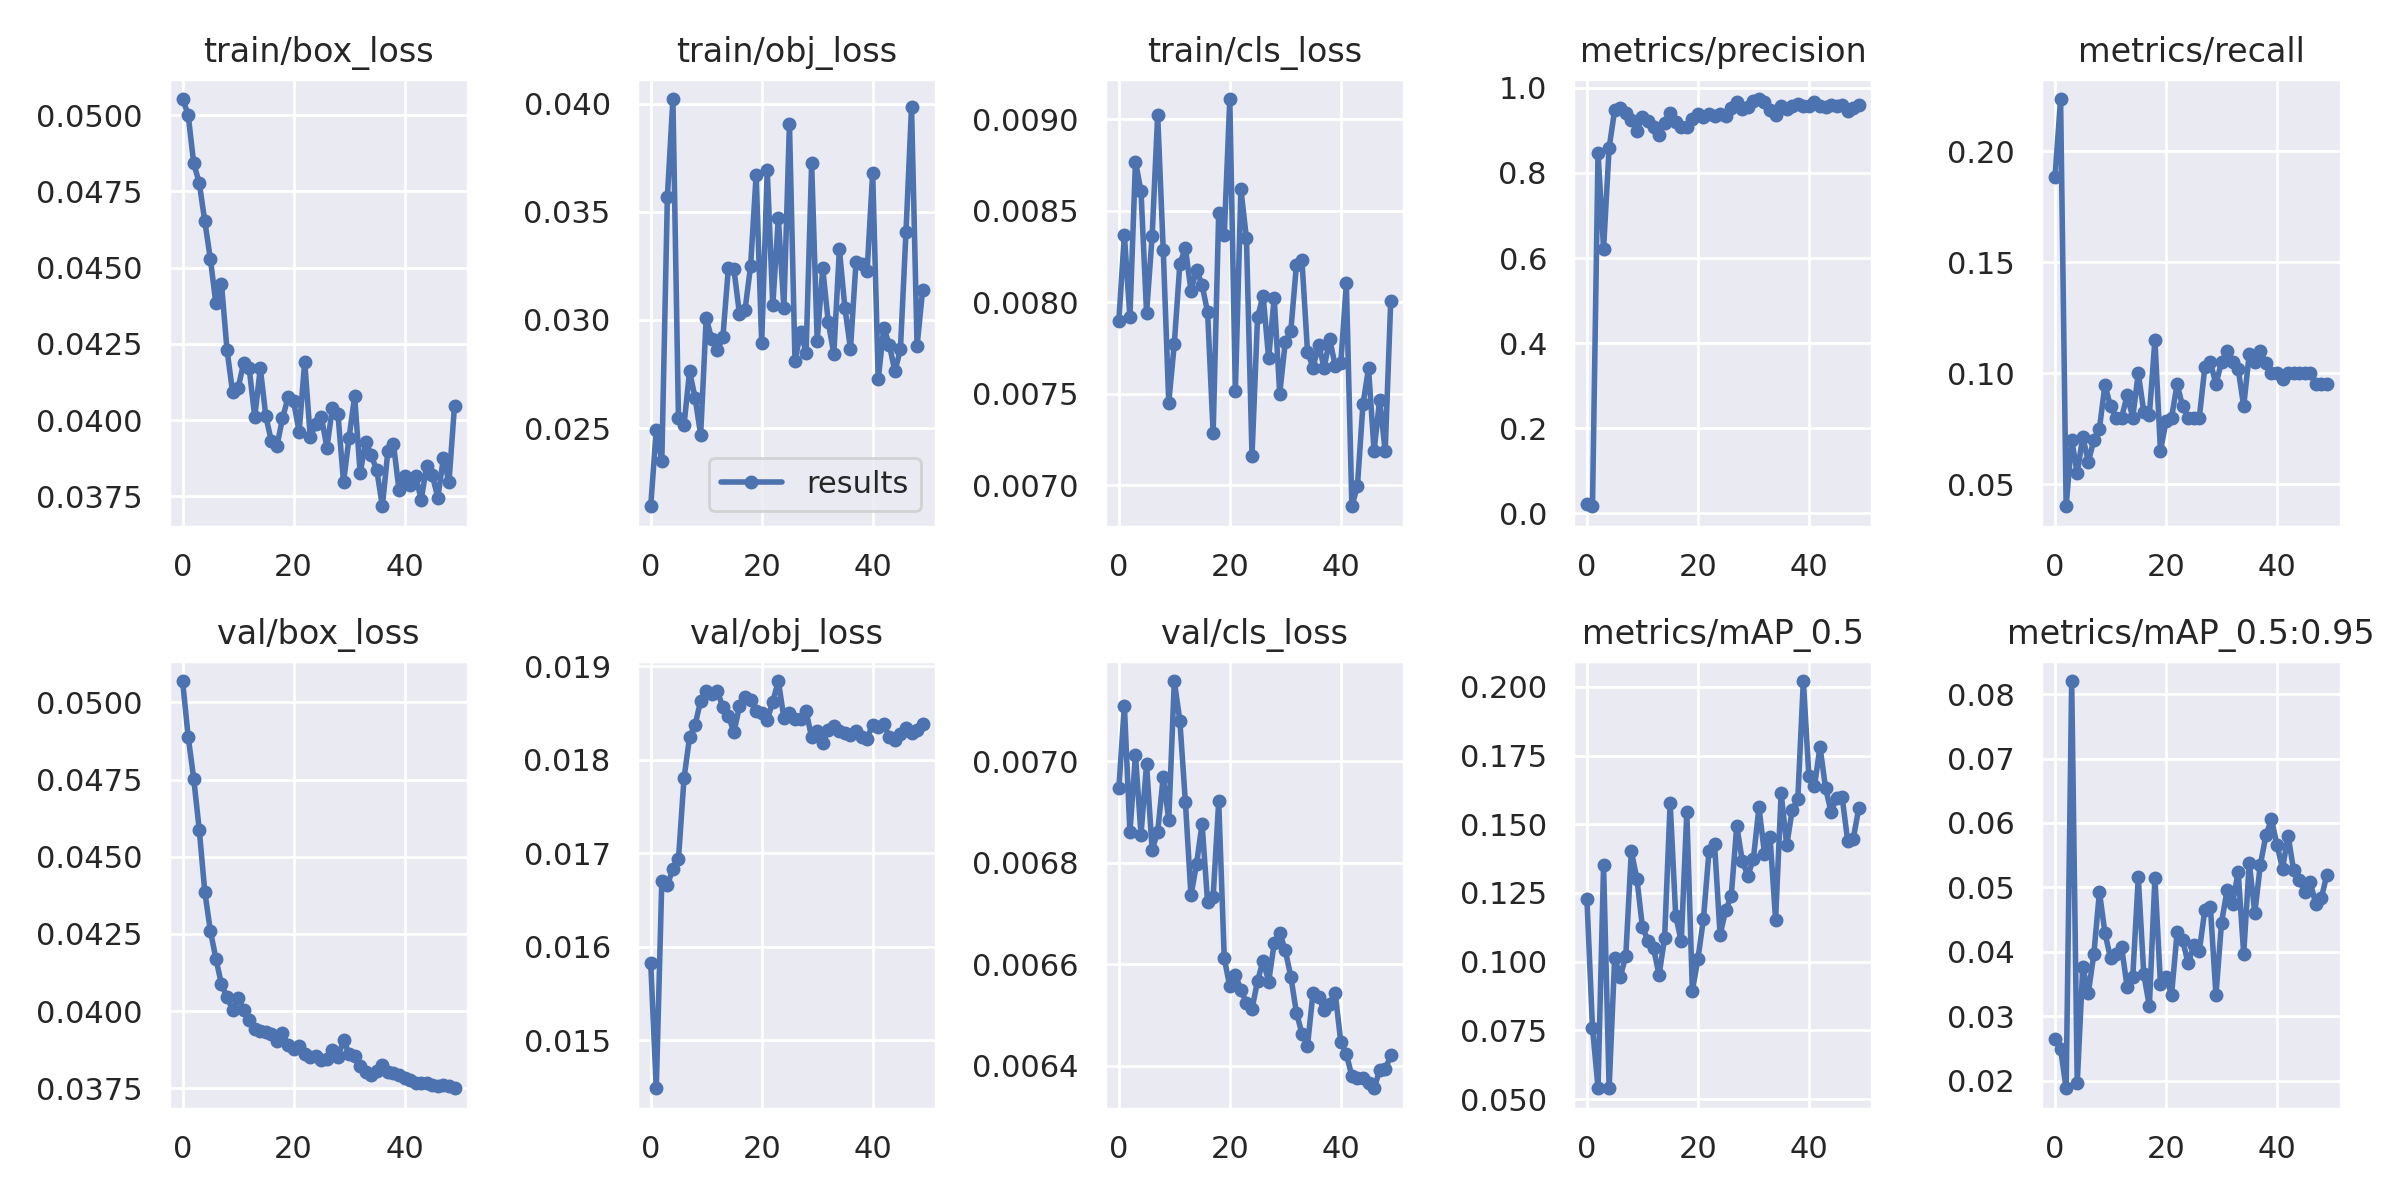

In [11]:
display.Image(f"runs_dental_disease/fine-tuning/results.png")

In [20]:
!python val.py --weights 'runs_dental_disease/fine-tuning/weights/best.pt' --batch 64 --data 'data/data.yaml' --task test --project 'runs_dental_disease' --name 'validation_on_test_data' --augment
clear_output()

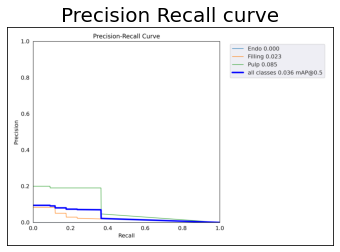

In [13]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_dental_disease/validation_on_test_data/PR_curve.png'))

In [16]:
!python detect.py --weights 'runs_dental_disease/fine-tuning/weights/best.pt'  --conf 0.6 --source '../datasets/dental_disease/images/test' --project 'runs_dental_disease' --name 'detect_test' --augment --line=3
clear_output()


In [23]:
!python detect.py --weights 'runs_dental_disease/fine-tuning/weights/last.pt'  --conf 0.6 --source '../datasets/dental_disease/images/test' --project 'runs_dental_disease' --name 'detect_test' --augment --line=3
clear_output()

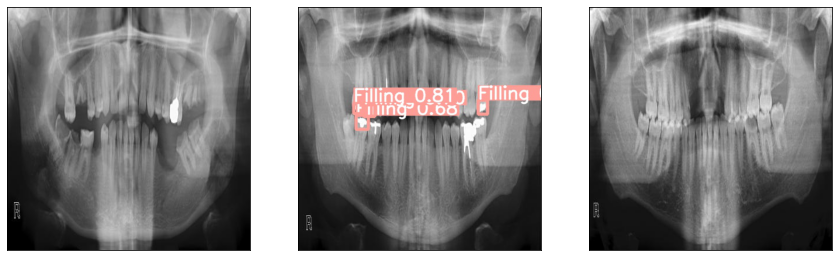

In [17]:
detect_path = r'runs_dental_disease/detect_test2'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

In [25]:
!python detect.py --weights 'runs_dental_disease/fine-tuning/weights/best.pt'  --conf 0.6 --source '../datasets/dental_disease/images/train' --project 'runs_dental_disease' --name 'detect_train' --augment --line=3
clear_output()

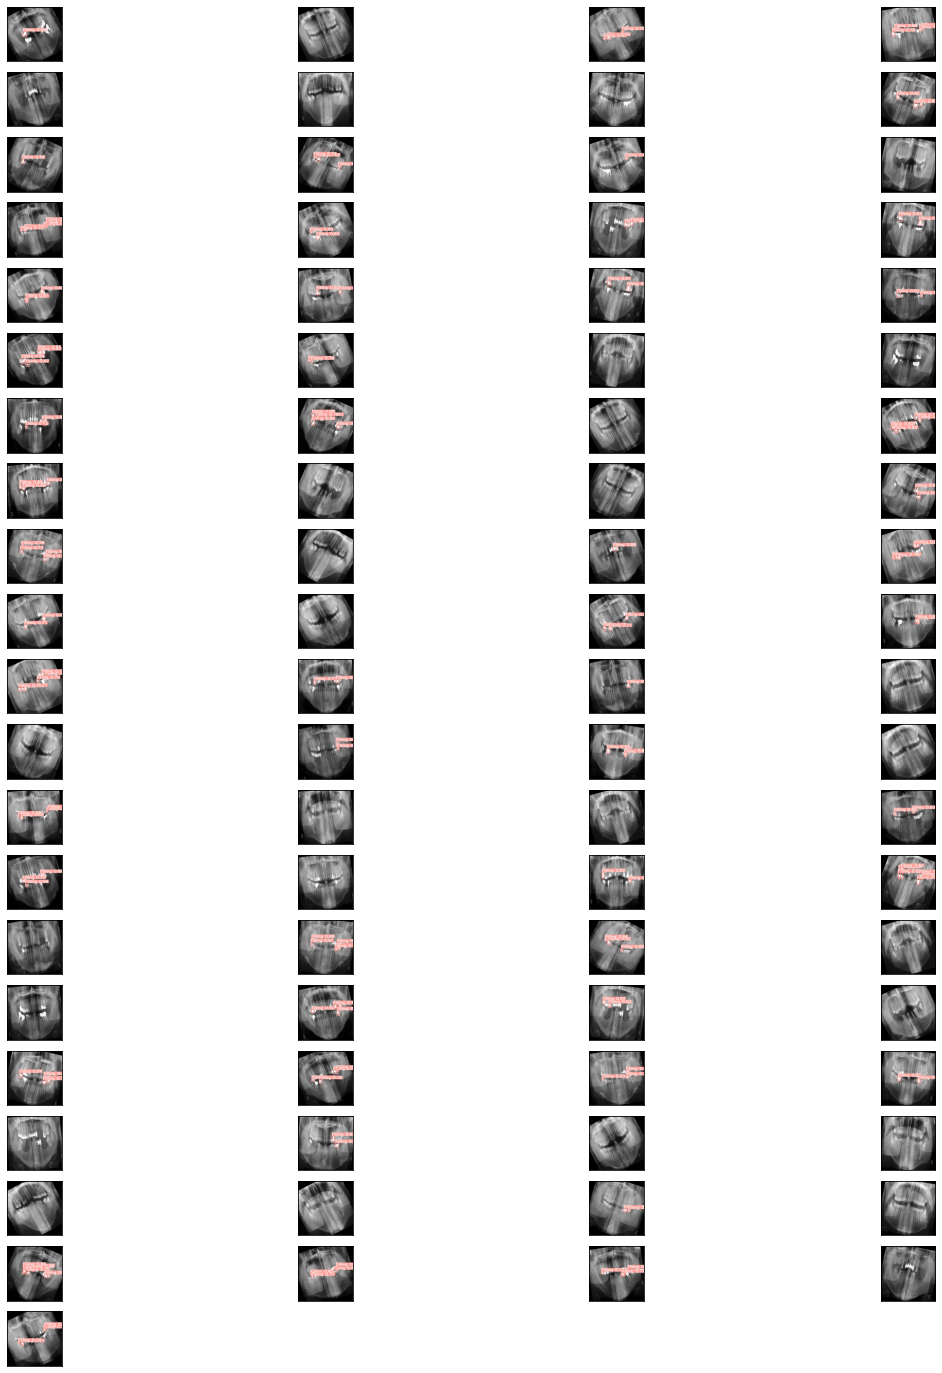

In [26]:
detect_path = r'runs_dental_disease/detect_train'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)